In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
# Muss dann für Live Version wieder aktiviert werden bzw. Manuell erzeugte Logs machen
warnings.filterwarnings('ignore')
import datetime as dt
import requests
import json
from openpyxl import load_workbook
from openpyxl.utils import get_column_letter, column_index_from_string

In [2]:
url = 'https://www.uvek-gis.admin.ch/BFE/ogd/35/ogd35_schweizerische_elektrizitaetsbilanz_monatswerte.csv'
r = requests.get(url, allow_redirects=True)
open('../Data/ogd35_schweizerische_elektrizitaetsbilanz_monatswerte.csv', 'wb').write(r.content)

17441

In [3]:
df_electricity_data_ch = pd.read_csv('../Data/ogd35_schweizerische_elektrizitaetsbilanz_monatswerte.csv', header=0, index_col=0, parse_dates=True, squeeze=True, sep=',')

In [4]:
df_electricity_data_ch.reset_index(inplace=True)
# make the column Jahr equal a string aggregation from the first 4 characters of the column Jahr puls the value of column month plus a '01'
df_electricity_data_ch['Jahr'] = df_electricity_data_ch['Jahr'].astype(str).str[:4] + df_electricity_data_ch['Monat'].astype(str).str.zfill(2) + '01'
# convert the column Jahr to a datetime object
df_electricity_data_ch['Jahr'] = pd.to_datetime(df_electricity_data_ch['Jahr'], format='%Y%m%d')
# set the column Jahr as index
df_electricity_data_ch.set_index('Jahr', inplace=True)
# drop the column Monat
df_electricity_data_ch.drop('Monat', axis=1, inplace=True)
# show head of the dataframe
df_electricity_data_ch.head()

,Definitiv,Erzeugung_laufwerk_GWh,Erzeugung_speicherwerk_GWh,Erzeugung_kernkraftwerk_GWh,Erzeugung_andere_GWh,Verbrauch_speicherpumpen_GWh,Erzeugung_netto_GWh,Einfuhr_GWh,Ausfuhr_GWh,Landesverbrauch_GWh,Verluste_GWh,Endverbrauch_GWh
Jahr,,,,,,,,,,,,
2000-01-01,1,891,2004,2354,238,72,5415,2580,2521,5474,346,5128
2000-02-01,1,959,1516,2213,232,40,4880,2478,2337,5021,353,4668
2000-03-01,1,1069,1463,2355,229,44,5072,2608,2596,5084,347,4737
2000-04-01,1,1196,1068,2278,218,139,4621,2181,2375,4427,334,4093
2000-05-01,1,2060,1920,2307,197,228,6256,1212,3034,4434,315,4119


In [5]:
df_electricity_data_ch_export = df_electricity_data_ch.copy()
df_electricity_data_ch_export.reset_index(inplace=True)
df_electricity_data_ch_export.to_csv('../Data/df_electricity_data_ch_edited.csv')

In [6]:
url = 'https://pubdb.bfe.admin.ch/de/publication/download/9333'
r = requests.get(url, allow_redirects=True)
open('../Data/aussenhandel_schweiz.xlsx', 'wb').write(r.content)

70743

In [7]:
file_path = '../Data/aussenhandel_schweiz.xlsx'
workbook = load_workbook(file_path)
sheet = workbook.worksheets[0]

In [8]:
file_path = '../Data/aussenhandel_schweiz.xlsx'
workbook = load_workbook(file_path)
sheet = workbook.worksheets[0]
rows_to_delete = [1, 2, 3, 4, 5, 6, 7,9] 

for row in reversed(rows_to_delete):  # Delete rows in reverse order to avoid index shifting
    sheet.delete_rows(row)

# Delete columns (e.g. columns U to AM)
columns_to_delete = ['AM', 'AL', 'AK', 'AJ', 'AI', 'AH', 'AG', 'AF', 'AE', 'AD', 'AC', 'AB', 'AA', 'Z', 'Y', 'X', 'W', 'V', 'U', 'T', 'S', 'R', 'Q', 'P', 'O', 'N', 'M', 'L', 'K', 'J', 'I', 'H', 'G']

for col in columns_to_delete:
    col_index = column_index_from_string(col)  # Convert column letter to integer index
    sheet.delete_cols(col_index, 1)

workbook.save('../Data/import.xlsx')

In [9]:
workbook = load_workbook(file_path)
sheet = workbook.worksheets[0]
rows_to_delete = [1, 2, 3, 4, 5, 6, 7, 9] 

for row in reversed(rows_to_delete):  # Delete rows in reverse order to avoid index shifting
    sheet.delete_rows(row)

# Delete columns (e.g. columns U to AM)
columns_to_delete = ['AM', 'AL', 'AK', 'AJ', 'AI', 'AH', 'AG', 'AF', 'AE', 'AD', 'AC', 'AB', 'AA', 'Z', 'Y', 'X', 'W', 'V', 'U', 'T', 'S', 'R', 'Q', 'P', 'O', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']

for col in columns_to_delete:
    col_index = column_index_from_string(col)  # Convert column letter to integer index
    sheet.delete_cols(col_index, 1)

workbook.save('../Data/export.xlsx')

In [10]:
df_import = pd.read_excel('../Data/import.xlsx')
df_export = pd.read_excel('../Data/export.xlsx')

In [11]:
#rename the first columns of the dataframes to 'Datum'
df_import.rename(columns={'Unnamed: 0': 'Datum'}, inplace=True)
df_export.rename(columns={'Unnamed: 0': 'Datum'}, inplace=True)

In [12]:
# head both dataframes
df_import.head()

,Datum,Deutschland,Frankreich,Italien,Oesterreich,Liechtenstein
0,Januar 2000,1274,904,16,386,0
1,Februar 2000,1154,890,17,417,0
2,März 2000,1162,1056,6,384,0
3,April 2000,947,848,1,385,0
4,Mai 2000,358,570,1,283,0


In [13]:
df_export.head()

,Datum,Deutschland,Frankreich,Italien,Oesterreich,Liechtenstein
0,Januar 2000,421,313,1760,3,24
1,Februar 2000,412,141,1757,4,23
2,März 2000,459,148,1962,4,23
3,April 2000,474,114,1767,3,17
4,Mai 2000,935,116,1927,42,14


In [14]:
#left join the two dataframes
df_import_export = df_import.merge(df_export, on='Datum', how='left', suffixes=('_import', '_export'))

In [15]:
df_import_export.head()

,Datum,Deutschland_import,Frankreich_import,Italien_import,Oesterreich_import,Liechtenstein_import,Deutschland_export,Frankreich_export,Italien_export,Oesterreich_export,Liechtenstein_export
0,Januar 2000,1274,904,16,386,0,421.0,313.0,1760.0,3.0,24.0
1,Februar 2000,1154,890,17,417,0,412.0,141.0,1757.0,4.0,23.0
2,März 2000,1162,1056,6,384,0,459.0,148.0,1962.0,4.0,23.0
3,April 2000,947,848,1,385,0,474.0,114.0,1767.0,3.0,17.0
4,Mai 2000,358,570,1,283,0,935.0,116.0,1927.0,42.0,14.0


In [16]:
import locale
locale.setlocale(locale.LC_TIME, 'de_DE')
date_format = '%B %Y'
df_import_export['Datum'] = pd.to_datetime(df_import_export['Datum'], format=date_format)
df_import_export = df_import_export.set_index('Datum')

In [17]:
# change Datumsformat to YYYY-MM-DD
df_import_export.index = df_import_export.index.strftime('%Y-%m-%d')
df_import_export.head()

,Deutschland_import,Frankreich_import,Italien_import,Oesterreich_import,Liechtenstein_import,Deutschland_export,Frankreich_export,Italien_export,Oesterreich_export,Liechtenstein_export
Datum,,,,,,,,,,
2000-01-01,1274,904,16,386,0,421.0,313.0,1760.0,3.0,24.0
2000-02-01,1154,890,17,417,0,412.0,141.0,1757.0,4.0,23.0
2000-03-01,1162,1056,6,384,0,459.0,148.0,1962.0,4.0,23.0
2000-04-01,947,848,1,385,0,474.0,114.0,1767.0,3.0,17.0
2000-05-01,358,570,1,283,0,935.0,116.0,1927.0,42.0,14.0


In [18]:
df_import_export_export = df_import_export.copy()
df_import_export_export.reset_index(inplace=True)
df_import_export_export.to_csv('../Data/df_import_export_edited.csv')

<AxesSubplot:xlabel='Datum'>

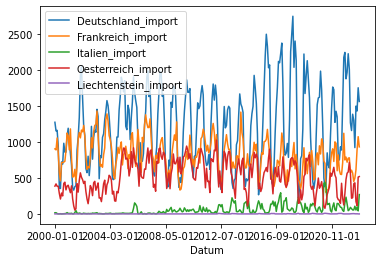

In [19]:
df_import_export[['Deutschland_import','Frankreich_import','Italien_import','Oesterreich_import','Liechtenstein_import']].plot()

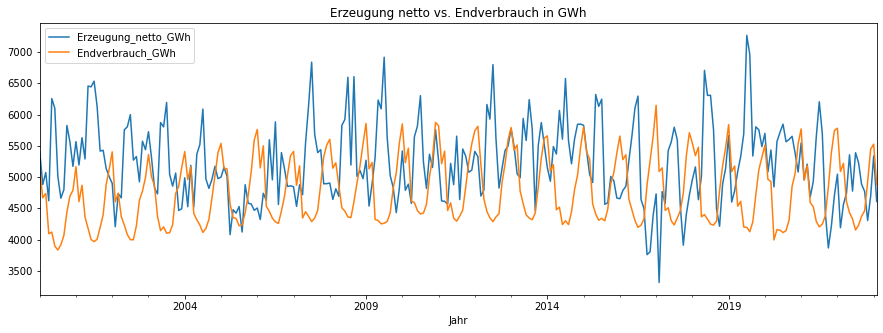

In [20]:
# plot the Erzeugung_netto_GWh column with the column Endverbrauch_GWh
df_electricity_data_ch[['Erzeugung_netto_GWh', 'Endverbrauch_GWh']].plot(figsize=(15, 5))
plt.title('Erzeugung netto vs. Endverbrauch in GWh')
plt.show()


## Consumerprices monthly switzerland

In [21]:
url = 'https://dam-api.bfs.admin.ch/hub/api/dam/assets/24785376/master'
r = requests.get(url, allow_redirects=True)
open('../Data/durchschnittspreise_nach_energie_schweiz.xlsx', 'wb').write(r.content)
file_path = '../Data/durchschnittspreise_nach_energie_schweiz.xlsx'
workbook = load_workbook(file_path)
sheet = workbook.worksheets[0]

In [22]:
rows_to_delete = [1, 2, 3, 5, 6] 

for row in reversed(rows_to_delete):  # Delete rows in reverse order to avoid index shifting
    sheet.delete_rows(row)

workbook.save('../Data/consumerprices_switzerland.xlsx')

In [25]:
df_consumer_prices = pd.read_excel('../Data/consumerprices_switzerland.xlsx')
df_consumer_prices.columns = ['monate','Gas_Verbrauchstyp_1_kWh','Gas_Verbrauchstyp_2_kWh','Gas_Verbrauchstyp_3_kWh','Gas_Verbrauchstyp_4_kWh','Gas_Verbrauchstyp_5_kWh','Elektrizität_Verbrauchstyp_1_kWh','Elektrizität_Verbrauchstyp_2_kWh','Elektrizität_Verbrauchstyp_3_kWh','Elektrizität_Verbrauchstyp_4_kWh','Elektrizität_Verbrauchstyp_5_kWh', 'Elektrizität_Verbrauchstyp_6_kWh','Elektrizität_Verbrauchstyp_7_kWh' ,"HeizölBM_800_1500_100l"	
,"Heizöl_BM_1501_3000_100l"	
,"Heizöl_BM_3001_6000_100l"	
,"Heizöl_BM_6001_9000_100l"	
,"Heizöl_BM_9001_14_000_100l"	
,"Heizöl_BM_14_001_20000_100l"	
,"Heizöl_BM_20000_plus_100l"
,'Holz_6t'
,'Bleifrei_95'
,'Bleifrei_98'
,'Diesel'
]
df_consumer_prices

,monate,Gas_Verbrauchstyp_1_kWh,Gas_Verbrauchstyp_2_kWh,Gas_Verbrauchstyp_3_kWh,Gas_Verbrauchstyp_4_kWh,Gas_Verbrauchstyp_5_kWh,Elektrizität_Verbrauchstyp_1_kWh,Elektrizität_Verbrauchstyp_2_kWh,Elektrizität_Verbrauchstyp_3_kWh,Elektrizität_Verbrauchstyp_4_kWh,...,Heizöl_BM_1501_3000_100l,Heizöl_BM_3001_6000_100l,Heizöl_BM_6001_9000_100l,Heizöl_BM_9001_14_000_100l,Heizöl_BM_14_001_20000_100l,Heizöl_BM_20000_plus_100l,Holz_6t,Bleifrei_95,Bleifrei_98,Diesel
0,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN
1,1993-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN
2,1993-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.03,NaN,NaN
3,1993-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19,NaN,NaN
4,1993-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.20,1.25,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_consumer_prices.to_csv('../Data/df_consumerprices.csv')
